<a href="https://colab.research.google.com/github/youngmantis/2023-NIgeria-Presidential-Election-Results-Analysis-and-Visualization/blob/main/CDD_Arachidonate_5_lipoxygenase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Drug Discovery**
# **Data collection, pre-processing. EDA and Descriptor calculations of Arachidonate 5-lipoxygenase bioactivity data**

**Alex Oyinola Adedayo**

Inspired from https://github.com/dataprofessor/bioinformatics_freecodecamp/

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)


In this Jupyter notebook, we will collect the target and the bioactivity data from ChEMBL database and pre-process it. We will also do exploratory data analysis and prepare descriptor dataset which will be used for prediction.

**Notebook Contents**:


* Data Collection and Pre-Processing from the ChEMBL Database.
* Exploratory Data Analysis
* Descriptor Dataset Preparation





## **Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.**

In [ ]:
pip install chembl_webresource_client

## **Import Libraries**

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Target search for Arachidonate 5-lipoxygenase**










In [ ]:
target = new_client.target
target_query = target.search('Cytochrome P450 2B6')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P20813', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 2B6,38.0,False,CHEMBL4729,"[{'accession': 'P20813', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P00176', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 2B1,25.0,False,CHEMBL3335,"[{'accession': 'P00176', 'component_descriptio...",SINGLE PROTEIN,10116
2,[],Oryctolagus cuniculus,Cytochrome P450 2B4,25.0,False,CHEMBL1743542,"[{'accession': 'P00178', 'component_descriptio...",SINGLE PROTEIN,9986
3,[],Homo sapiens,Cytochrome P450,25.0,False,CHEMBL4523986,"[{'accession': 'P08684', 'component_descriptio...",PROTEIN FAMILY,9606
4,"[{'xref_id': 'P10632', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 2C8,24.0,False,CHEMBL3721,"[{'accession': 'P10632', 'component_descriptio...",SINGLE PROTEIN,9606
...,...,...,...,...,...,...,...,...,...
152,[],Spinacia oleracea,Cytochrome b6-f complex subunit 4,9.0,False,CHEMBL2366461,"[{'accession': 'P00166', 'component_descriptio...",SINGLE PROTEIN,3562
153,"[{'xref_id': 'O00483', 'xref_name': None, 'xre...",Homo sapiens,NADH-ubiquinone oxidoreductase MLRQ subunit,8.0,False,CHEMBL2317,"[{'accession': 'O00483', 'component_descriptio...",SINGLE PROTEIN,9606
154,[],Saccharomyces cerevisiae,Succinate dehydrogenase,8.0,False,CHEMBL3308955,"[{'accession': 'P37298', 'component_descriptio...",SINGLE PROTEIN,559292
155,[],Homo sapiens,Apoptotic protease-activating factor 1/Caspase...,5.0,False,CHEMBL3885517,"[{'accession': 'P55211', 'component_descriptio...",PROTEIN COMPLEX,9606


## **Select and retrieve bioactivity data for Human Arachidonate 5-lipoxygenase (second entry)**

We will assign the second entry (which corresponds to the target protein, Human Arachidonate 5-lipoxygenase) to the selected_target variable

In [ ]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL4729'

Retrieve only bioactivity data for Human Arachidonate 5-lipoxygenase (CHEMBL289) that are reported as pChEMBL values.

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1416775,[],CHEMBL829412,Inhibitory concentration value against human c...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2B6,9606,None,None,IC50,uM,UO_0000065,None,6.8
1,None,None,1416789,[],CHEMBL829412,Inhibitory concentration value against human c...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2B6,9606,None,None,IC50,uM,UO_0000065,None,146.0
2,None,None,1416803,[],CHEMBL829412,Inhibitory concentration value against human c...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2B6,9606,None,None,IC50,uM,UO_0000065,None,83.1
3,None,None,1416914,[],CHEMBL829412,Inhibitory concentration value against human c...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2B6,9606,None,None,IC50,uM,UO_0000065,None,5.3
4,None,None,1416928,[],CHEMBL829412,Inhibitory concentration value against human c...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2B6,9606,None,None,IC50,uM,UO_0000065,None,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24925630,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5167700,Inhibition of CYP2B6 in human liver microsomes...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2B6,9606,None,None,IC50,uM,UO_0000065,None,0.21
568,None,None,24925631,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5167700,Inhibition of CYP2B6 in human liver microsomes...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2B6,9606,None,None,IC50,uM,UO_0000065,None,10.0
569,None,None,24925632,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5167700,Inhibition of CYP2B6 in human liver microsomes...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2B6,9606,None,None,IC50,uM,UO_0000065,None,10.0
570,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24927898,[],CHEMBL5168155,Inhibition of CYP2B6 in human liver microsomes,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 2B6,9606,None,None,IC50,uM,UO_0000065,None,19.2


Save the resulting bioactivity data to a CSV file bioactivity_data.csv.






In [ ]:
df.to_csv('Arachidonate 5-lipoxygenase_01_bioactivity_data_raw.csv', index=False)

## **Handling missing data**

If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [ ]:
df2 = df[df.standard_value.notna()]

df2 = df2[df.canonical_smiles.notna()]

df2

len(df2.canonical_smiles.unique())

df2_nr = df2.drop_duplicates(['canonical_smiles'])

df2_nr

df2_nr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 571
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   action_type                31 non-null     object
 1   activity_comment           12 non-null     object
 2   activity_id                478 non-null    int64 
 3   activity_properties        478 non-null    object
 4   assay_chembl_id            478 non-null    object
 5   assay_description          478 non-null    object
 6   assay_type                 478 non-null    object
 7   assay_variant_accession    0 non-null      object
 8   assay_variant_mutation     0 non-null      object
 9   bao_endpoint               478 non-null    object
 10  bao_format                 478 non-null    object
 11  bao_label                  478 non-null    object
 12  canonical_smiles           478 non-null    object
 13  data_validity_comment      30 non-null     object
 14  data_valid

<ipython-input-180-7d62f92f2be2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


## **Data pre-processing of the bioactivity data**

**Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL179529,CNc1ccc(-c2cccnc2)s1,6800.0
1,CHEMBL360999,Cn1cnc(-c2cccnc2)c1,146000.0
2,CHEMBL361364,CCn1cnc(-c2cccnc2)c1,83100.0
3,CHEMBL178780,c1ccc(Cn2cnc(-c3cccnc3)c2)cc1,5300.0
4,CHEMBL178781,Cc1cn(-c2cccnc2)cn1,300000.0
...,...,...,...
566,CHEMBL5186978,Cc1onc(-c2ccc(F)cc2)c1COc1ccc2c(n1)CCN(C(=O)CS...,20800.0
568,CHEMBL5191392,O=c1nc2n(c3c1CN(Cc1ccccc1)CC3)CCN2Cc1ccc(F)c(B...,10000.0
569,CHEMBL4297310,Cc1ccccc1CN1C(=O)C2=C(CCN(Cc3ccccc3)C2)N2CCN=C12,10000.0
570,CHEMBL5200584,CC#CC(=O)Nc1cc(-c2cc3c(cn2)cc(-c2c(Cl)c(OC)cc(...,19200.0


Saves dataframe to CSV file

In [ ]:
df3.to_csv('Arachidonate 5-lipoxygenase_02_bioactivity_data_preprocessed.csv', index=False)

**Labeling compounds as either being active, inactive or intermediate**

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [ ]:
df4 = pd.read_csv('Arachidonate 5-lipoxygenase_02_bioactivity_data_preprocessed.csv')

bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL179529,CNc1ccc(-c2cccnc2)s1,6800.0,intermediate
1,CHEMBL360999,Cn1cnc(-c2cccnc2)c1,146000.0,inactive
2,CHEMBL361364,CCn1cnc(-c2cccnc2)c1,83100.0,inactive
3,CHEMBL178780,c1ccc(Cn2cnc(-c3cccnc3)c2)cc1,5300.0,intermediate
4,CHEMBL178781,Cc1cn(-c2cccnc2)cn1,300000.0,inactive
...,...,...,...,...
473,CHEMBL5186978,Cc1onc(-c2ccc(F)cc2)c1COc1ccc2c(n1)CCN(C(=O)CS...,20800.0,inactive
474,CHEMBL5191392,O=c1nc2n(c3c1CN(Cc1ccccc1)CC3)CCN2Cc1ccc(F)c(B...,10000.0,inactive
475,CHEMBL4297310,Cc1ccccc1CN1C(=O)C2=C(CCN(Cc3ccccc3)C2)N2CCN=C12,10000.0,inactive
476,CHEMBL5200584,CC#CC(=O)Nc1cc(-c2cc3c(cn2)cc(-c2c(Cl)c(OC)cc(...,19200.0,inactive


Saves dataframe to CSV file

In [ ]:
df5.to_csv('Arachidonate 5-lipoxygenase_03_bioactivity_data_curated.csv', index=False)

In [ ]:
! zip Arachidonate 5-lipoxygenase.zip *.csv

	zip warning: name not matched: 5-lipoxygenase.zip
updating: Arachidonate 5-lipoxygenase_01_bioactivity_data_raw.csv (deflated 89%)
updating: Arachidonate 5-lipoxygenase_02_bioactivity_data_preprocessed.csv (deflated 73%)
updating: Arachidonate 5-lipoxygenase_03_bioactivity_data_curated.csv (deflated 76%)
updating: Arachidonate 5-lipoxygenase_04_bioactivity_data_3class_pIC50.csv (deflated 73%)
updating: Arachidonate 5-lipoxygenase_05_bioactivity_data_2class_pIC50.csv (deflated 73%)
updating: mannwhitneyu_LogP.csv (deflated 8%)
updating: mannwhitneyu_MW.csv (deflated 9%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: mannwhitneyu_NumHDonors.csv (deflated 10%)
updating: mannwhitneyu_pIC50.csv (deflated 12%)
  adding: Alkaline phosphatase tissue-nonspecific_06_bioactivity_data_3class_pIC50_pubchem_fp.csv (deflated 94%)
  adding: Arachidonate 5-lipoxygenase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv (deflated 94%)
  adding: Cytochrome P450 2B6_06_bioactivity_data_3c

In [ ]:
! ls -l

total 223872
-rw-r--r-- 1 root root  1547374 Sep  3 02:45 'Alkaline phosphatase tissue-nonspecific_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
-rw-r--r-- 1 root root   288405 Sep  3 03:34 'Arachidonate 5-lipoxygenase_01_bioactivity_data_raw.csv'
-rw-r--r-- 1 root root    34309 Sep  3 03:34 'Arachidonate 5-lipoxygenase_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 root root    38879 Sep  3 03:34 'Arachidonate 5-lipoxygenase_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 root root   105220 Sep  3 02:40 'Arachidonate 5-lipoxygenase_04_bioactivity_data_3class_pIC50.csv'
-rw-r--r-- 1 root root    82527 Sep  3 02:40 'Arachidonate 5-lipoxygenase_05_bioactivity_data_2class_pIC50.csv'
-rw-r--r-- 1 root root  1547374 Sep  3 02:43 'Arachidonate 5-lipoxygenase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
-rw-r--r-- 1 root root   458269 Sep  3 03:34  Arachidonate.zip
-rw-r--r-- 1 root root  1547374 Sep  3 03:34 'Cytochrome P450 2B6_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
-rw-r

# **Exploratory Data Analysis**
Here, the Descriptor Calculation and Exploratory Data Analysis will be performed.

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-09-03 03:34:56--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’

Miniconda3-py37_4.8 100%[===================>]  81.12M   178MB/s    in 0.5s    

2023-09-03 03:34:57 (178 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    -

In [ ]:
df_no_smiles = df5.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df5.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL179529,6800.0,intermediate,CNc1ccc(-c2cccnc2)s1
1,CHEMBL360999,146000.0,inactive,Cn1cnc(-c2cccnc2)c1
2,CHEMBL361364,83100.0,inactive,CCn1cnc(-c2cccnc2)c1
3,CHEMBL178780,5300.0,intermediate,c1ccc(Cn2cnc(-c3cccnc3)c2)cc1
4,CHEMBL178781,300000.0,inactive,Cc1cn(-c2cccnc2)cn1
...,...,...,...,...
473,CHEMBL5186978,20800.0,inactive,Cc1onc(-c2ccc(F)cc2)c1COc1ccc2c(n1)CCN(C(=O)CS...
474,CHEMBL5191392,10000.0,inactive,O=c1nc2n(c3c1CN(Cc1ccccc1)CC3)CCN2Cc1ccc(F)c(B...
475,CHEMBL4297310,10000.0,inactive,Cc1ccccc1CN1C(=O)C2=C(CCN(Cc3ccccc3)C2)N2CCN=C12
476,CHEMBL5200584,19200.0,inactive,CC#CC(=O)Nc1cc(-c2cc3c(cn2)cc(-c2c(Cl)c(OC)cc(...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [ ]:
!pip install rdkit-pypi -qqq
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,190.271,2.85180,1.0,3.0
1,159.192,1.48210,0.0,3.0
2,173.219,1.96500,0.0,3.0
3,235.290,2.99340,0.0,3.0
4,159.192,1.57572,0.0,3.0
...,...,...,...,...
473,459.499,2.69242,0.0,7.0
474,469.358,3.72340,0.0,5.0
475,386.499,3.16882,0.0,4.0
476,663.558,6.02230,1.0,9.0


### **Combine DataFrames**

Combine the df_lipinski and df5 DataFrames.

In [ ]:
df_combined = pd.concat([df5,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL179529,CNc1ccc(-c2cccnc2)s1,6800.0,intermediate,190.271,2.85180,1.0,3.0
1,CHEMBL360999,Cn1cnc(-c2cccnc2)c1,146000.0,inactive,159.192,1.48210,0.0,3.0
2,CHEMBL361364,CCn1cnc(-c2cccnc2)c1,83100.0,inactive,173.219,1.96500,0.0,3.0
3,CHEMBL178780,c1ccc(Cn2cnc(-c3cccnc3)c2)cc1,5300.0,intermediate,235.290,2.99340,0.0,3.0
4,CHEMBL178781,Cc1cn(-c2cccnc2)cn1,300000.0,inactive,159.192,1.57572,0.0,3.0
...,...,...,...,...,...,...,...,...
473,CHEMBL5186978,Cc1onc(-c2ccc(F)cc2)c1COc1ccc2c(n1)CCN(C(=O)CS...,20800.0,inactive,459.499,2.69242,0.0,7.0
474,CHEMBL5191392,O=c1nc2n(c3c1CN(Cc1ccccc1)CC3)CCN2Cc1ccc(F)c(B...,10000.0,inactive,469.358,3.72340,0.0,5.0
475,CHEMBL4297310,Cc1ccccc1CN1C(=O)C2=C(CCN(Cc3ccccc3)C2)N2CCN=C12,10000.0,inactive,386.499,3.16882,0.0,4.0
476,CHEMBL5200584,CC#CC(=O)Nc1cc(-c2cc3c(cn2)cc(-c2c(Cl)c(OC)cc(...,19200.0,inactive,663.558,6.02230,1.0,9.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count    4.780000e+02
mean     1.475037e+05
std      1.016472e+06
min      5.000000e+01
25%      1.000000e+04
50%      2.500000e+04
75%      5.000000e+04
max      1.000000e+07
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-200-c8e03533cbc3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL179529,CNc1ccc(-c2cccnc2)s1,intermediate,190.271,2.85180,1.0,3.0,6800.0
1,CHEMBL360999,Cn1cnc(-c2cccnc2)c1,inactive,159.192,1.48210,0.0,3.0,146000.0
2,CHEMBL361364,CCn1cnc(-c2cccnc2)c1,inactive,173.219,1.96500,0.0,3.0,83100.0
3,CHEMBL178780,c1ccc(Cn2cnc(-c3cccnc3)c2)cc1,intermediate,235.290,2.99340,0.0,3.0,5300.0
4,CHEMBL178781,Cc1cn(-c2cccnc2)cn1,inactive,159.192,1.57572,0.0,3.0,300000.0
...,...,...,...,...,...,...,...,...
473,CHEMBL5186978,Cc1onc(-c2ccc(F)cc2)c1COc1ccc2c(n1)CCN(C(=O)CS...,inactive,459.499,2.69242,0.0,7.0,20800.0
474,CHEMBL5191392,O=c1nc2n(c3c1CN(Cc1ccccc1)CC3)CCN2Cc1ccc(F)c(B...,inactive,469.358,3.72340,0.0,5.0,10000.0
475,CHEMBL4297310,Cc1ccccc1CN1C(=O)C2=C(CCN(Cc3ccccc3)C2)N2CCN=C12,inactive,386.499,3.16882,0.0,4.0,10000.0
476,CHEMBL5200584,CC#CC(=O)Nc1cc(-c2cc3c(cn2)cc(-c2c(Cl)c(OC)cc(...,inactive,663.558,6.02230,1.0,9.0,19200.0


In [ ]:
df_norm.standard_value_norm.describe()

count    4.780000e+02
mean     1.475037e+05
std      1.016472e+06
min      5.000000e+01
25%      1.000000e+04
50%      2.500000e+04
75%      5.000000e+04
max      1.000000e+07
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

<ipython-input-196-62152670485b>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL179529,CNc1ccc(-c2cccnc2)s1,intermediate,190.271,2.85180,1.0,3.0,5.167491
1,CHEMBL360999,Cn1cnc(-c2cccnc2)c1,inactive,159.192,1.48210,0.0,3.0,3.835647
2,CHEMBL361364,CCn1cnc(-c2cccnc2)c1,inactive,173.219,1.96500,0.0,3.0,4.080399
3,CHEMBL178780,c1ccc(Cn2cnc(-c3cccnc3)c2)cc1,intermediate,235.290,2.99340,0.0,3.0,5.275724
4,CHEMBL178781,Cc1cn(-c2cccnc2)cn1,inactive,159.192,1.57572,0.0,3.0,3.522879
...,...,...,...,...,...,...,...,...
473,CHEMBL5186978,Cc1onc(-c2ccc(F)cc2)c1COc1ccc2c(n1)CCN(C(=O)CS...,inactive,459.499,2.69242,0.0,7.0,4.681937
474,CHEMBL5191392,O=c1nc2n(c3c1CN(Cc1ccccc1)CC3)CCN2Cc1ccc(F)c(B...,inactive,469.358,3.72340,0.0,5.0,5.000000
475,CHEMBL4297310,Cc1ccccc1CN1C(=O)C2=C(CCN(Cc3ccccc3)C2)N2CCN=C12,inactive,386.499,3.16882,0.0,4.0,5.000000
476,CHEMBL5200584,CC#CC(=O)Nc1cc(-c2cc3c(cn2)cc(-c2c(Cl)c(OC)cc(...,inactive,663.558,6.02230,1.0,9.0,4.716699


In [ ]:
df_final.pIC50.describe()

count    478.000000
mean       4.650703
std        0.653036
min        2.000000
25%        4.301030
50%        4.602060
75%        5.000000
max        7.301030
Name: pIC50, dtype: float64

Write this to CSV file.

In [ ]:
df_final.to_csv('Arachidonate 5-lipoxygenase_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Removing the ``intermediate`` class from the data set.

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL360999,Cn1cnc(-c2cccnc2)c1,inactive,159.192,1.48210,0.0,3.0,3.835647
2,CHEMBL361364,CCn1cnc(-c2cccnc2)c1,inactive,173.219,1.96500,0.0,3.0,4.080399
4,CHEMBL178781,Cc1cn(-c2cccnc2)cn1,inactive,159.192,1.57572,0.0,3.0,3.522879
5,CHEMBL179618,c1cncc(-c2cccs2)c1,inactive,161.229,2.81010,0.0,2.0,4.149967
7,CHEMBL179398,O=Cc1ccc(-c2cccnc2)s1,inactive,189.239,2.62260,0.0,3.0,4.665546
...,...,...,...,...,...,...,...,...
473,CHEMBL5186978,Cc1onc(-c2ccc(F)cc2)c1COc1ccc2c(n1)CCN(C(=O)CS...,inactive,459.499,2.69242,0.0,7.0,4.681937
474,CHEMBL5191392,O=c1nc2n(c3c1CN(Cc1ccccc1)CC3)CCN2Cc1ccc(F)c(B...,inactive,469.358,3.72340,0.0,5.0,5.000000
475,CHEMBL4297310,Cc1ccccc1CN1C(=O)C2=C(CCN(Cc3ccccc3)C2)N2CCN=C12,inactive,386.499,3.16882,0.0,4.0,5.000000
476,CHEMBL5200584,CC#CC(=O)Nc1cc(-c2cc3c(cn2)cc(-c2c(Cl)c(OC)cc(...,inactive,663.558,6.02230,1.0,9.0,4.716699


Write this to CSV file.

In [ ]:
df_2class.to_csv('Arachidonate 5-lipoxygenase_05_bioactivity_data_2class_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

**Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**



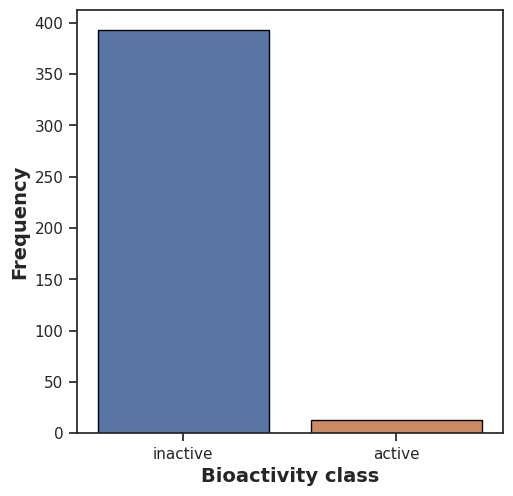

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

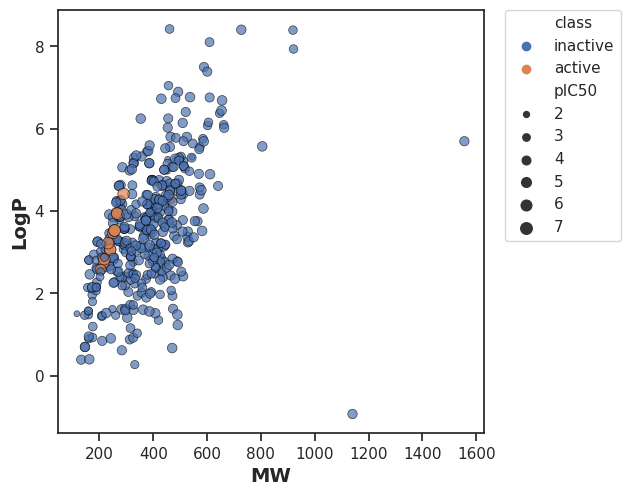

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_MW_vs_LogP.pdf')
plt.show()

It can be seen that the 2 bioactivity classes are  spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

### **Box plots**

#### **pIC50 value**

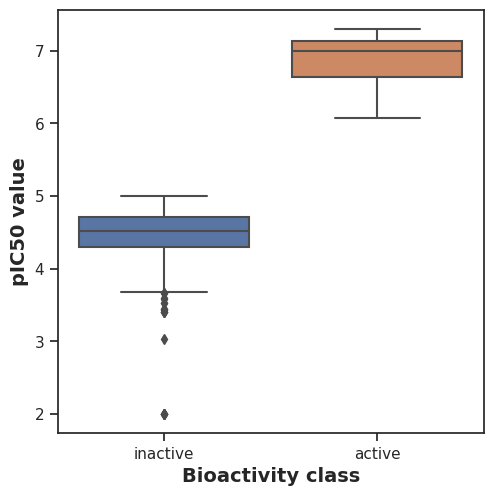

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,5109.0,7.486191e-10,0.05,Different distribution (reject H0)


#### **MW**

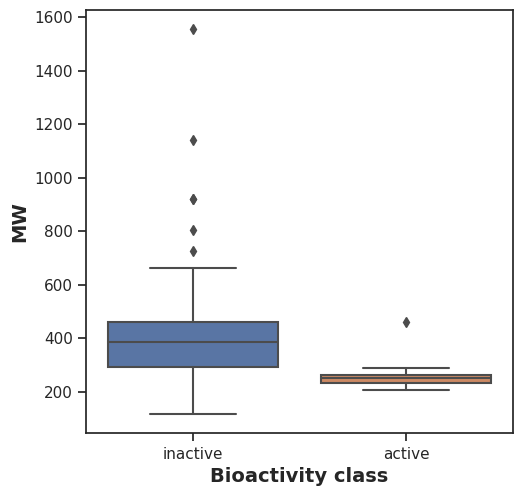

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,994.5,0.000179,0.05,Different distribution (reject H0)


#### **LogP**

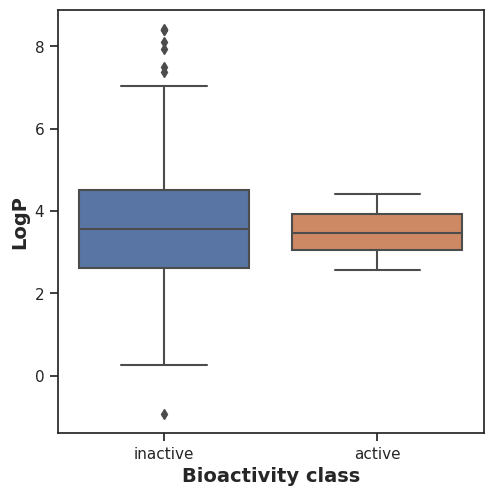

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2385.0,0.684751,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

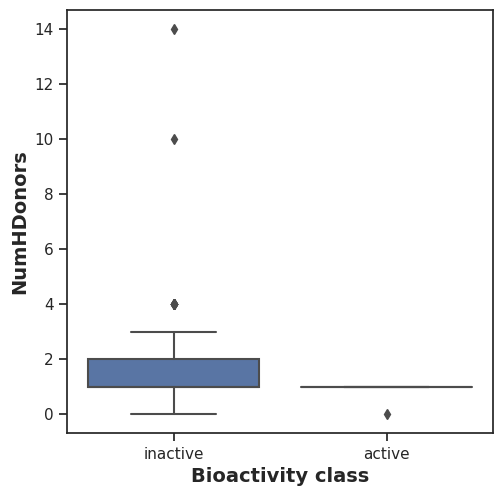

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2037.5,0.176583,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

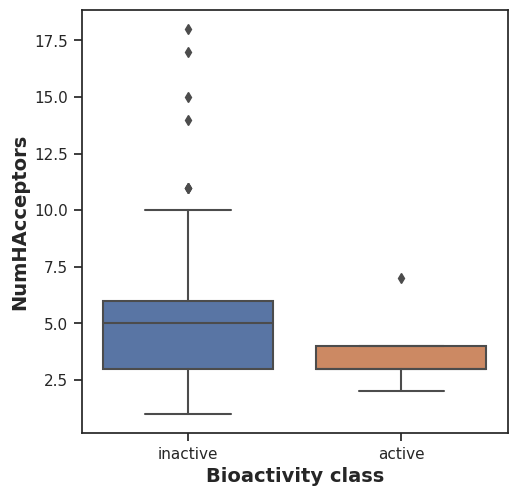

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1426.0,0.00603,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

3 (MW, LogP and NumHAcceptors) out of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives** while the NumHDonors descriptor exhibited ***no statistically significant difference*** between the **actives** and **inactives**

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

updating: plot_NumHDonors.pdf (deflated 37%)
updating: plot_NumHAcceptors.pdf (deflated 38%)
updating: Arachidonate 5-lipoxygenase_03_bioactivity_data_curated.csv (deflated 76%)
updating: mannwhitneyu_NumHDonors.csv (deflated 10%)
updating: Arachidonate 5-lipoxygenase_02_bioactivity_data_preprocessed.csv (deflated 73%)
updating: Arachidonate 5-lipoxygenase_05_bioactivity_data_2class_pIC50.csv (deflated 72%)
updating: mannwhitneyu_MW.csv (deflated 9%)
updating: mannwhitneyu_LogP.csv (deflated 7%)
updating: Arachidonate 5-lipoxygenase_04_bioactivity_data_3class_pIC50.csv (deflated 72%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 12%)
updating: Arachidonate 5-lipoxygenase_01_bioactivity_data_raw.csv (deflated 89%)
updating: plot_ic50.pdf (deflated 37%)
updating: plot_LogP.pdf (deflated 38%)
updating: plot_bioactivity_class.pdf (deflated 38%)
updating: plot_MW.pdf (deflated 38%)
updating: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: Cytochrome P450 2B6_06_bioactivity_data_3class_

# **Descriptor Calculation and Dataset Preparation**
 Here, we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. We will also be preparing this into a dataset for subsequent model building.

## **Download PaDEL-Descriptor**

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-09-03 03:36:04--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-09-03 03:36:05--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.2’

padel.zip.2         100%[===================>]  24.57M   143MB/s    in 0.2s    

2023-09-03 03:36:05 (143 MB/s) - ‘padel.zip.2’ saved [25768637/25768637]

--2023-09-03 03:36:05--  https://gi

## **Load bioactivity data**

Here we will be using the bioactivity_data_3class_pIC50.csv file that essentially contain the pIC50 values that we will be using for building a regression model.

In [ ]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._PaDEL-Descriptor  
replace PaDEL-Descriptor/MACCSFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]es
error:  invalid response [[y]es]
replace PaDEL-Descriptor/MACCSFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
replace __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
replace PaDEL-Descriptor/AtomPairs2DFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
replace __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
replace PaDEL-Descriptor/EStateFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]e

In [ ]:
df6 = pd.read_csv('Arachidonate 5-lipoxygenase_04_bioactivity_data_3class_pIC50.csv')

In [ ]:
df6

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL179529,CNc1ccc(-c2cccnc2)s1,intermediate,190.271,2.85180,1.0,3.0,5.167491
1,1,CHEMBL360999,Cn1cnc(-c2cccnc2)c1,inactive,159.192,1.48210,0.0,3.0,3.835647
2,2,CHEMBL361364,CCn1cnc(-c2cccnc2)c1,inactive,173.219,1.96500,0.0,3.0,4.080399
3,3,CHEMBL178780,c1ccc(Cn2cnc(-c3cccnc3)c2)cc1,intermediate,235.290,2.99340,0.0,3.0,5.275724
4,4,CHEMBL178781,Cc1cn(-c2cccnc2)cn1,inactive,159.192,1.57572,0.0,3.0,3.522879
...,...,...,...,...,...,...,...,...,...
473,473,CHEMBL5186978,Cc1onc(-c2ccc(F)cc2)c1COc1ccc2c(n1)CCN(C(=O)CS...,inactive,459.499,2.69242,0.0,7.0,4.681937
474,474,CHEMBL5191392,O=c1nc2n(c3c1CN(Cc1ccccc1)CC3)CCN2Cc1ccc(F)c(B...,inactive,469.358,3.72340,0.0,5.0,5.000000
475,475,CHEMBL4297310,Cc1ccccc1CN1C(=O)C2=C(CCN(Cc3ccccc3)C2)N2CCN=C12,inactive,386.499,3.16882,0.0,4.0,5.000000
476,476,CHEMBL5200584,CC#CC(=O)Nc1cc(-c2cc3c(cn2)cc(-c2c(Cl)c(OC)cc(...,inactive,663.558,6.02230,1.0,9.0,4.716699


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df6_selection = df6[selection]
df6_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

CNc1ccc(-c2cccnc2)s1	CHEMBL179529
Cn1cnc(-c2cccnc2)c1	CHEMBL360999
CCn1cnc(-c2cccnc2)c1	CHEMBL361364
c1ccc(Cn2cnc(-c3cccnc3)c2)cc1	CHEMBL178780
Cc1cn(-c2cccnc2)cn1	CHEMBL178781


In [ ]:
! cat molecule.smi | wc -l

478


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL179529 in molecule.smi (1/478). 
Processing CHEMBL360999 in molecule.smi (2/478). 
Processing CHEMBL361364 in molecule.smi (3/478). Average speed: 2.29 s/mol.
Processing CHEMBL178780 in molecule.smi (4/478). Average speed: 1.21 s/mol.
Processing CHEMBL178781 in molecule.smi (5/478). Average speed: 0.95 s/mol.
Processing CHEMBL179618 in molecule.smi (6/478). Average speed: 0.81 s/mol.
Processing CHEMBL179669 in molecule.smi (7/478). Average speed: 0.67 s/mol.
Processing CHEMBL179398 in molecule.smi (8/478). Average speed: 0.64 s/mol.
Processing CHEMBL362702 in molecule.smi (9/478). Average speed: 0.57 s/mol.
Processing CHEMBL361153 in molecule.smi (10/478). Average speed: 0.58 s/mol.
Processing CHEMBL179005 in molecule.smi (11/478). Average speed: 0.54 s/mol.
Processing CHEMBL179704 in molecule.smi (12/478). Average speed: 0.58 s/mol.
Processing CHEMBL425519 in molecule.smi (13/478). Average speed: 0.50 s/mol.
Processing CHEMBL179763 in molecule.smi (14/478). Average sp

In [ ]:
! ls -l

total 331676
-rw-r--r-- 1 root root  1547374 Sep  3 02:45 'Alkaline phosphatase tissue-nonspecific_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
-rw-r--r-- 1 root root   288405 Sep  3 03:34 'Arachidonate 5-lipoxygenase_01_bioactivity_data_raw.csv'
-rw-r--r-- 1 root root    34309 Sep  3 03:34 'Arachidonate 5-lipoxygenase_02_bioactivity_data_preprocessed.csv'
-rw-r--r-- 1 root root    38879 Sep  3 03:34 'Arachidonate 5-lipoxygenase_03_bioactivity_data_curated.csv'
-rw-r--r-- 1 root root    63980 Sep  3 03:36 'Arachidonate 5-lipoxygenase_04_bioactivity_data_3class_pIC50.csv'
-rw-r--r-- 1 root root    54555 Sep  3 03:36 'Arachidonate 5-lipoxygenase_05_bioactivity_data_2class_pIC50.csv'
-rw-r--r-- 1 root root  1547374 Sep  3 02:43 'Arachidonate 5-lipoxygenase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
-rw-r--r-- 1 root root   458269 Sep  3 03:34  Arachidonate.zip
-rw-r--r-- 1 root root  1547374 Sep  3 03:34 'Cytochrome P450 2B6_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
-rw-r

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [ ]:
df6_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df6_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL360999,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL179529,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL361364,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL178781,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL178780,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,CHEMBL5186978,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
474,CHEMBL5191392,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
475,CHEMBL4297310,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
476,CHEMBL5200584,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df6_X = df6_X.drop(columns=['Name'])
df6_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
474,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
475,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
476,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [ ]:
df6_Y = df6['pIC50']
df6_Y

0      5.167491
1      3.835647
2      4.080399
3      5.275724
4      3.522879
         ...   
473    4.681937
474    5.000000
475    5.000000
476    4.716699
477    4.661942
Name: pIC50, Length: 478, dtype: float64

## **Combining X and Y variable**

In [ ]:
dataset6 = pd.concat([df6_X,df6_Y], axis=1)
dataset6

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.167491
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.835647
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.080399
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.275724
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.681937
474,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
475,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
476,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.716699


In [ ]:
dataset6.to_csv('Cytochrome P450 2B6_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)